In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
data = pd.read_csv('insurance.csv')
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


# EDA Analysis

In [31]:
data.shape

(1338, 7)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [34]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [35]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

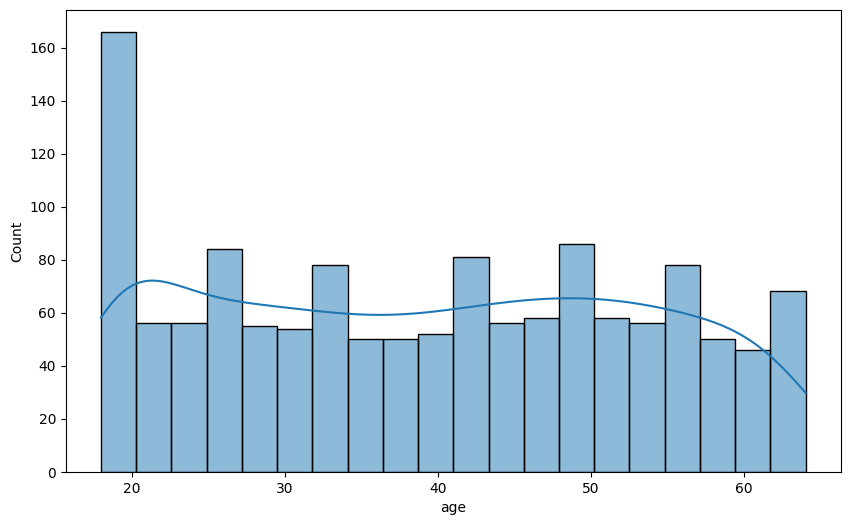

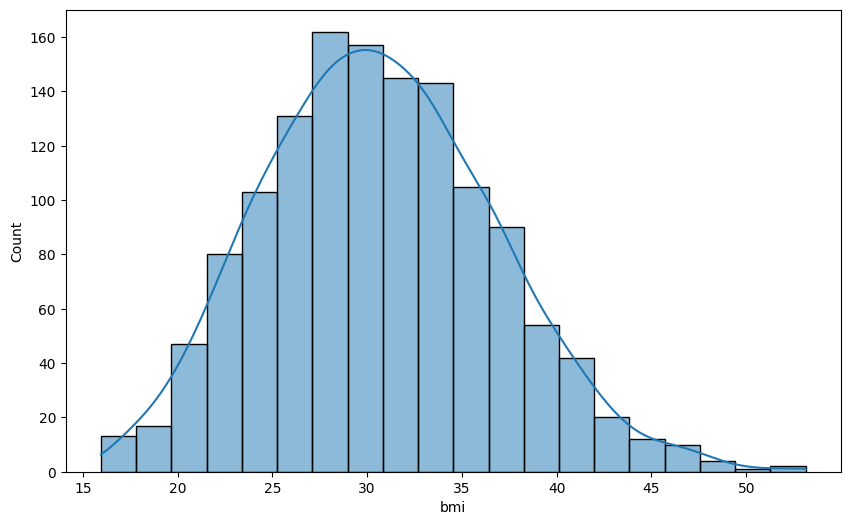

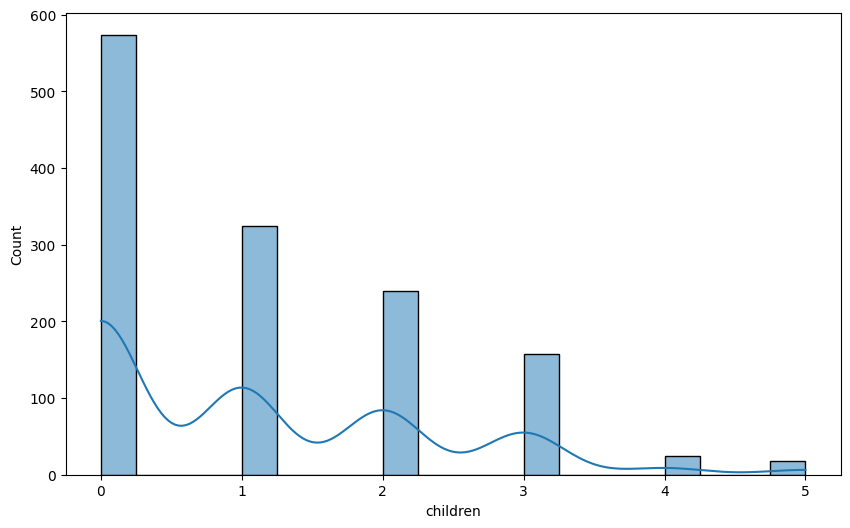

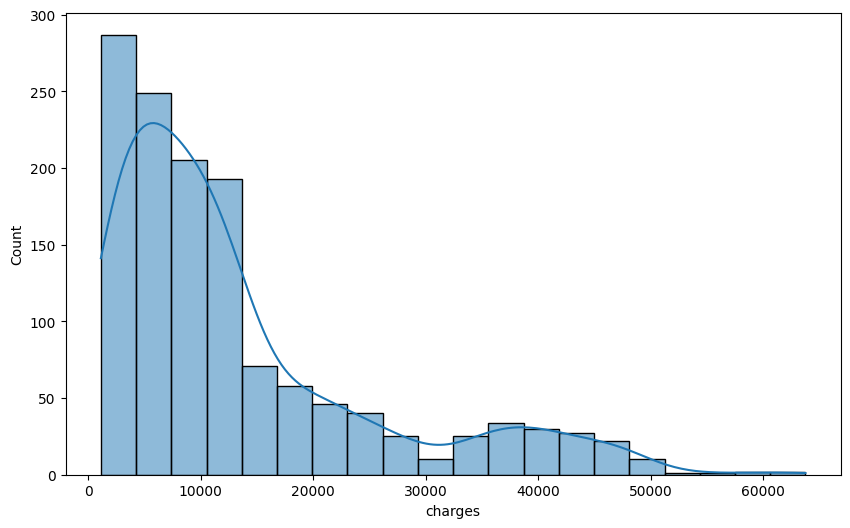

In [36]:
numeric_cols = ["age", "bmi", "children", "charges"]
categorical_cols = ["sex", "smoker", "region"]

# Outlier Detection
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True,bins=20)

<Axes: xlabel='children', ylabel='count'>

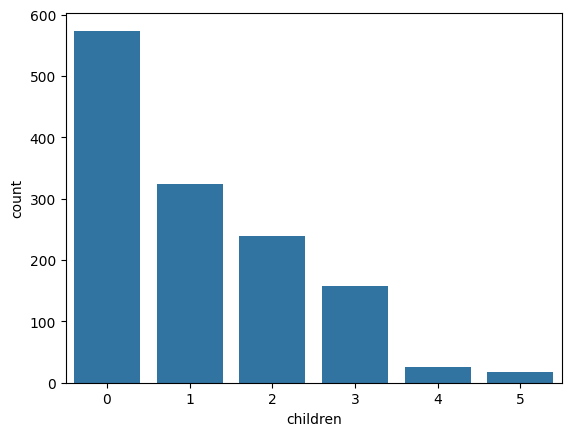

In [37]:
sns.countplot(x=data['children'])

<Axes: xlabel='sex', ylabel='count'>

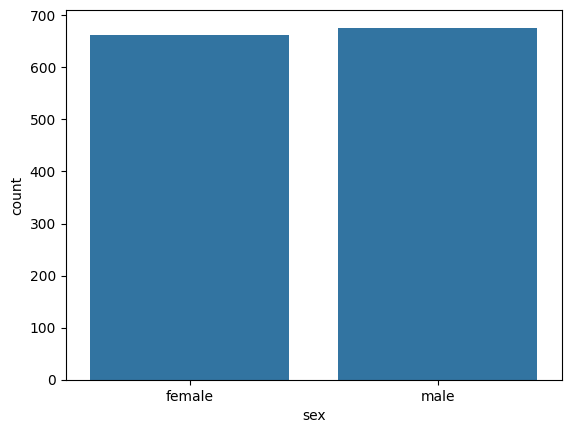

In [38]:
sns.countplot(x=data['sex'])

<Axes: xlabel='smoker', ylabel='count'>

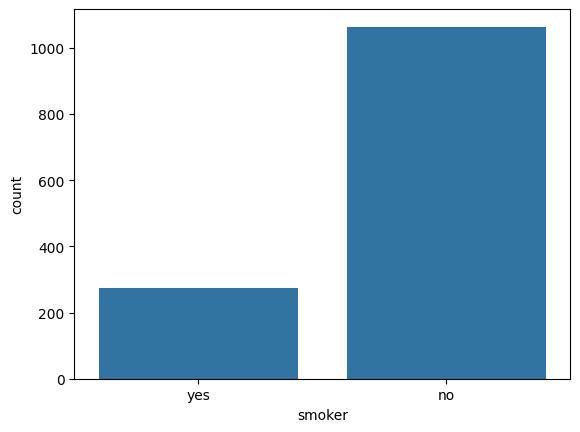

In [39]:
sns.countplot(x=data['smoker'])

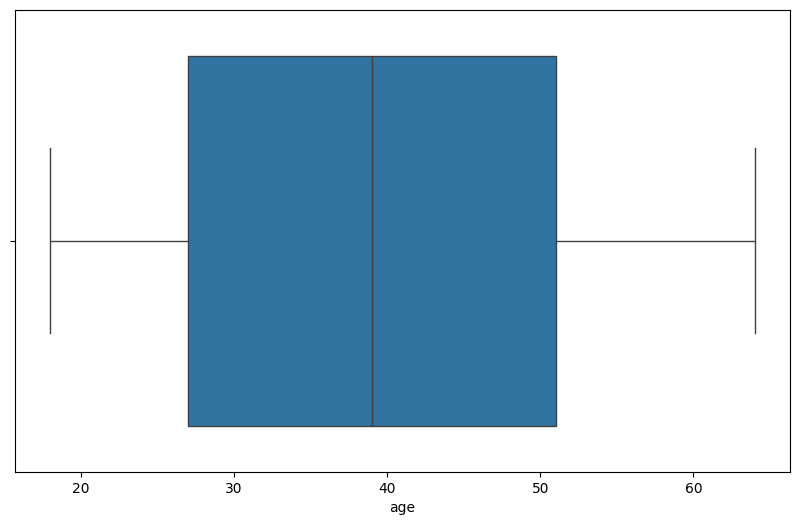

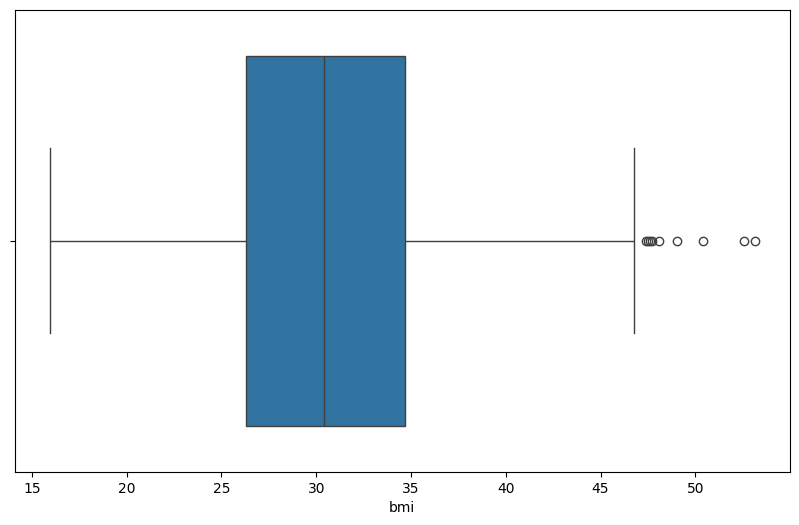

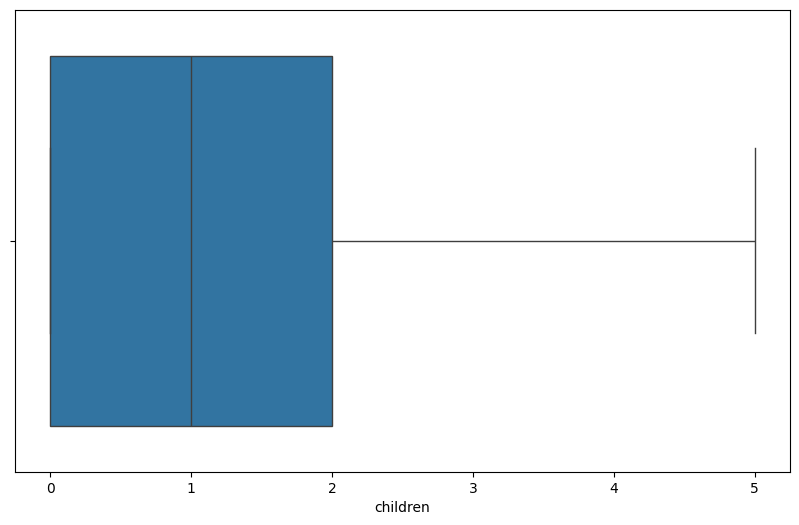

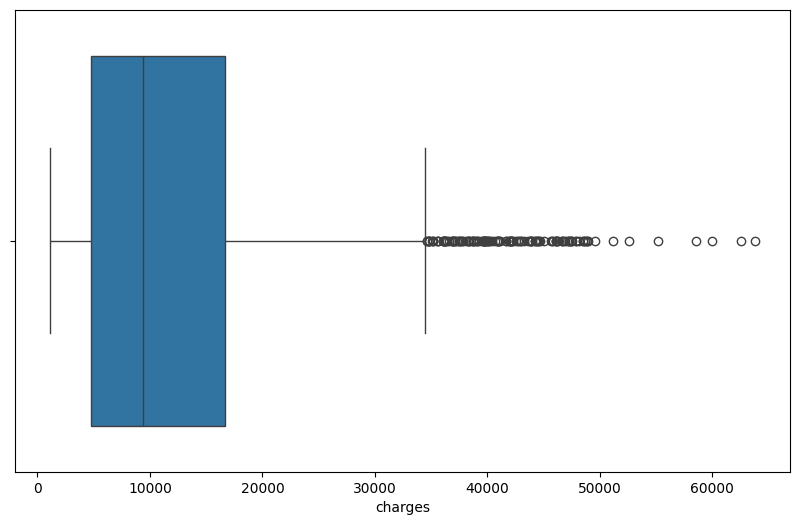

In [40]:
for col in numeric_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=data[col])

<Axes: >

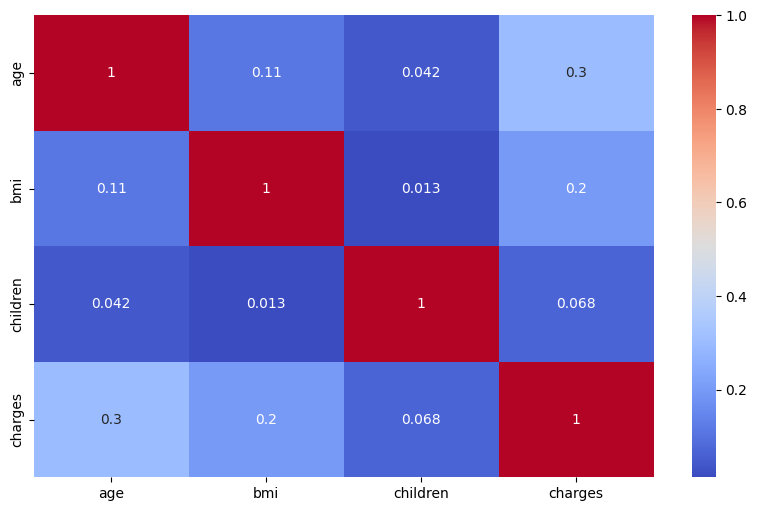

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm')


# Data cleaning and preprocessing

In [42]:
df_cleaned = data.copy()

In [43]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
# before cleaning
df_cleaned.shape

(1338, 7)

In [45]:
# after cleaning
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.shape

(1337, 7)

In [46]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [47]:
df_cleaned["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [48]:
# encoding categorical data - here we are using label encoding
df_cleaned["sex"] = df_cleaned["sex"].map({"male":1,"female":0})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [49]:
df_cleaned["smoker"].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [50]:
df_cleaned["smoker"] = df_cleaned["smoker"].map({"yes":1,"no":0})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [51]:
df_cleaned.rename(columns ={
    "sex": "is_male",
    "smoker": "is_smoker"
},inplace=True)
df_cleaned.head()


,age,is_male,bmi,children,is_smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [52]:
df_cleaned["region"].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [53]:
df_cleaned = pd.get_dummies(df_cleaned,columns=["region"],drop_first=True)

In [54]:
df_cleaned.head()

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [55]:
df_cleaned = df_cleaned.astype(int)

In [56]:
df_cleaned.head()

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,1
1,18,1,33,1,0,1725,0,1,0
2,28,1,33,3,0,4449,0,1,0
3,33,1,22,0,0,21984,1,0,0
4,32,1,28,0,0,3866,1,0,0
